In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
X,y = make_blobs(n_samples=500, centers = 5)
print (X.shape,y.shape)

(500, 2) (500,)


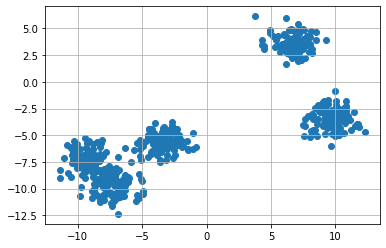

In [5]:
plt.figure(0)
plt.grid("on")
plt.scatter(X[:,0], X[:,1])
plt.show()

In [7]:
k = 5

colors = ['green','red','blue','yellow','orange','pink']

clusters = {}

for kx in range(k):
    centre = 10.0*(2*np.random.random((X.shape[1],)) -1)
    points = []
    cluster = {
        
        'centre' : centre,
        'points' : points,
        'color' : colors[kx]
    }
    clusters[kx] = cluster
    
print (clusters)

{0: {'centre': array([-3.95673806,  9.26342178]), 'points': [], 'color': 'green'}, 1: {'centre': array([-8.98749528,  3.06536453]), 'points': [], 'color': 'red'}, 2: {'centre': array([-6.0634767 , -5.41608646]), 'points': [], 'color': 'blue'}, 3: {'centre': array([2.2843    , 9.01190419]), 'points': [], 'color': 'yellow'}, 4: {'centre': array([-5.18878167, -1.84872206]), 'points': [], 'color': 'orange'}}


In [8]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

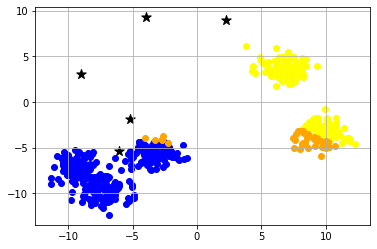

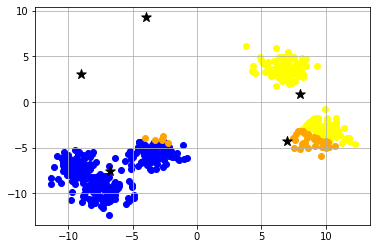

In [9]:
for ix in range(X.shape[0]):
    dist = []
    curr_x = X[ix]
    
    for kx in range(k):
        d = distance(curr_x, clusters[kx]['centre'])
        dist.append(d)
    
    current_cluster = np.argmin(dist)
    
    clusters[current_cluster]['points'].append(curr_x)
    
for kx in range(k):
    pts = np.array(clusters[kx]['points'])
    
    clusters[kx]['coords'] = pts
    
plt.figure(0)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
    except:
        pass
    
    center = clusters[kx]['centre']
    plt.scatter(center[0],center[1], color='black',s=100,marker="*")

for kx in range(k):
    if clusters[kx]['coords'].shape[0] > 0:
        new_center = clusters[kx]['coords'].mean(axis=0)
    else:
        new_center = clusters[kx]['centre']
    
    clusters[kx]['centre'] = new_center
    clusters[kx]['points'] = []
    
plt.figure(1)
plt.grid("on")

for kx in range(k):
    pts = clusters[kx]['coords']
    
    try:
        plt.scatter(pts[:,0],pts[:,1], color = clusters[kx]['color'])
    except:
        pass
    
    center = clusters[kx]['centre']
    plt.scatter(center[0],center[1], color='black',s=100,marker="*")